In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [20]:
df = pd.read_csv('Annual Greenhouse Gas (GHG) Air Emissions Accounts.csv')

In [21]:
df.columns

Index(['Country', 'ISO2', 'ISO3', 'Industry', 'Gas_Type', 'F2010', 'F2011',
       'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019',
       'F2020', 'F2021', 'F2022'],
      dtype='object')

In [22]:
# Display basic statistics of numerical columns
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
       ISO2         F2010         F2011         F2012         F2013  \
count   0.0  1.186000e+03  1.186000e+03  1.186000e+03  1.186000e+03   
mean    NaN  7.871620e+02  8.087643e+02  8.192881e+02  8.328579e+02   
std     NaN  2.986214e+03  3.094635e+03  3.146775e+03  3.207087e+03   
min     NaN -4.440000e-15 -9.380000e-15 -5.880000e-15 -9.100000e-15   
25%     NaN  3.392096e+00  3.359107e+00  3.506533e+00  3.609378e+00   
50%     NaN  4.115801e+01  4.153315e+01  4.287393e+01  4.364143e+01   
75%     NaN  3.577597e+02  3.600748e+02  3.660298e+02  3.686307e+02   
max     NaN  4.624233e+04  4.760897e+04  4.832278e+04  4.912791e+04   

              F2014         F2015         F2016         F2017         F2018  \
count  1.186000e+03  1.186000e+03  1.186000e+03  1.186000e+03  1.186000e+03   
mean   8.399073e+02  8.357463e+02  8.244420e+02  8.373828e+02  8.566463e+02   
std    3.240924e+03  3.219070e+03  3.170544e+03  3.228680e+03  3.315027e+03   
min   -1.550000e-15 -3.550

In [23]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country        0
ISO2        1186
ISO3           0
Industry       0
Gas_Type       0
F2010          0
F2011          0
F2012          0
F2013          0
F2014          0
F2015          0
F2016          0
F2017          0
F2018          0
F2019          0
F2020          0
F2021          0
F2022          0
dtype: int64


In [24]:
# Calculate total emissions for each gas type
df['Total_Emissions'] = df[['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 
                            'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']].sum(axis=1)

# Group by gas type and sum total emissions
total_emissions_by_gas = df.groupby('Gas_Type')['Total_Emissions'].sum()

# Find the gas type with the highest total emissions
most_emitting_gas = total_emissions_by_gas.idxmax()
highest_emissions = total_emissions_by_gas.max()

print("Gas type with the highest total emissions:", most_emitting_gas)
print("Total emissions:", highest_emissions)


Gas type with the highest total emissions: Greenhouse gas
Total emissions: 6438034.002803875


In [25]:
numerical_columns = ['F2010','F2011','F2012', 'F2013','F2014','F2015','F2016','F2017','F2018','F2019','F2020','F2021', 'F2022']

In [26]:
df.columns

Index(['Country', 'ISO2', 'ISO3', 'Industry', 'Gas_Type', 'F2010', 'F2011',
       'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019',
       'F2020', 'F2021', 'F2022', 'Total_Emissions'],
      dtype='object')

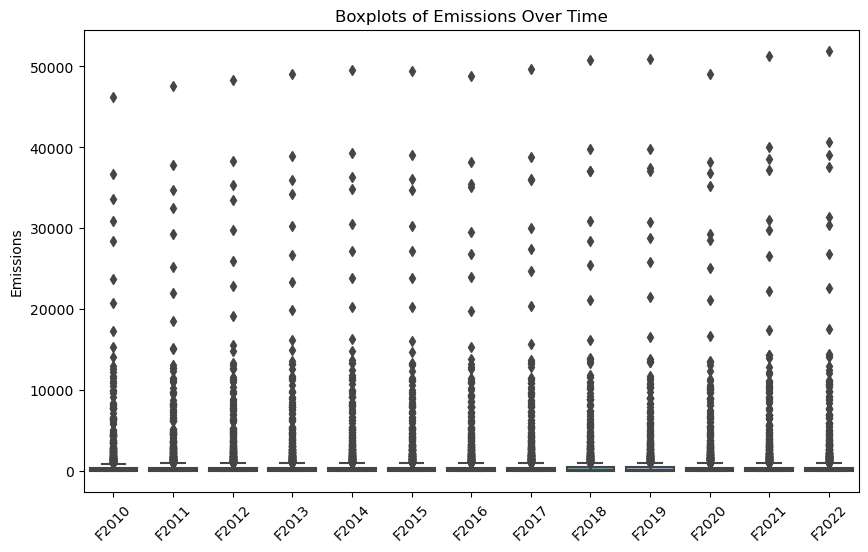

In [27]:
# Boxplots for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplots of Emissions Over Time')
plt.ylabel('Emissions')
plt.xticks(rotation=45)
plt.show()

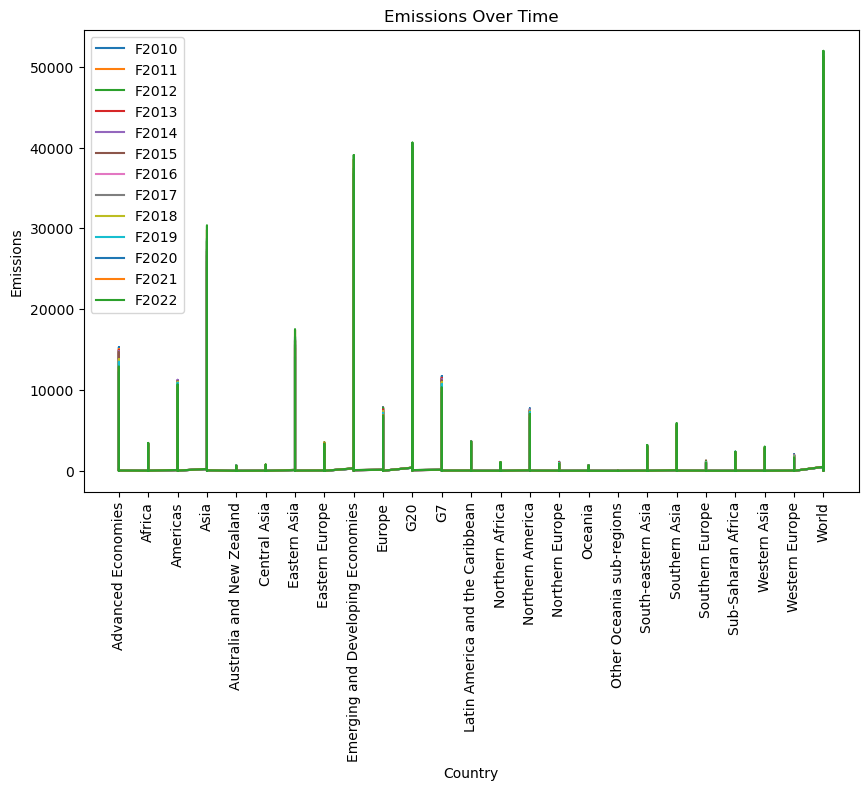

In [28]:
# Line plot for emissions over time
plt.figure(figsize=(10, 6))
for column in numerical_columns:
    plt.plot(df['Country'], df[column], label=column)
plt.title('Emissions Over Time')
plt.xlabel('Country')
plt.ylabel('Emissions')
plt.xticks(rotation=90)
plt.legend()
plt.show()

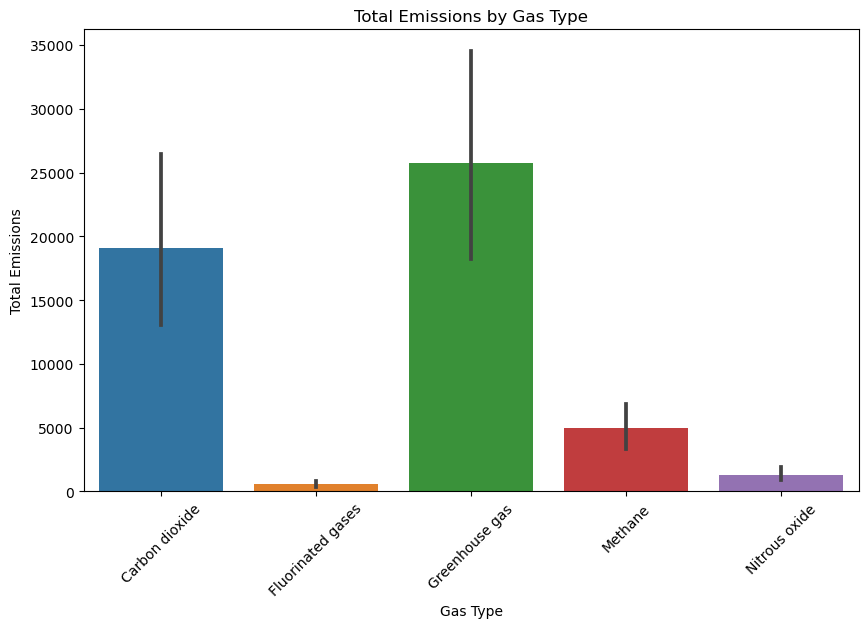

In [29]:
# Bar plot for emissions by gas type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gas_Type', y='Total_Emissions')
plt.title('Total Emissions by Gas Type')
plt.xlabel('Gas Type')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()

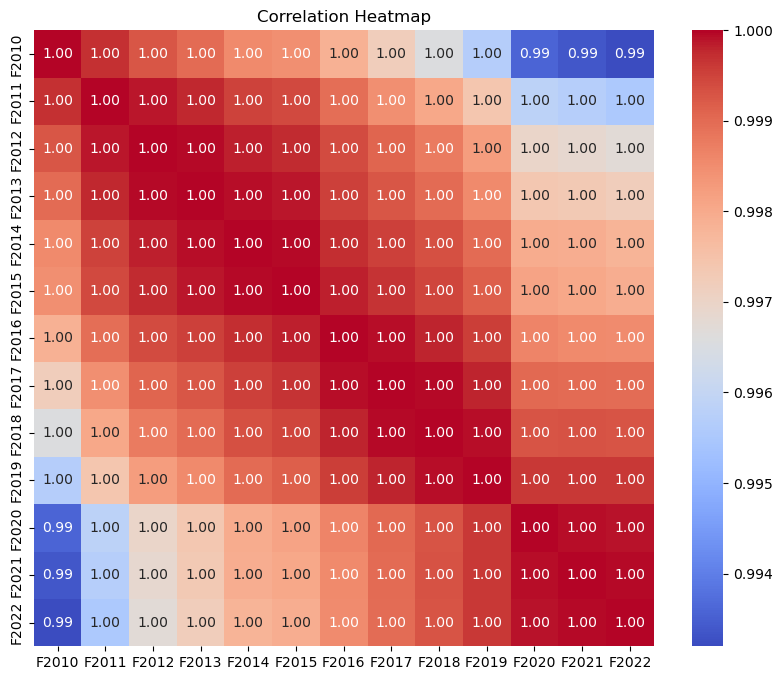

In [30]:
# Heatmap of correlations between numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


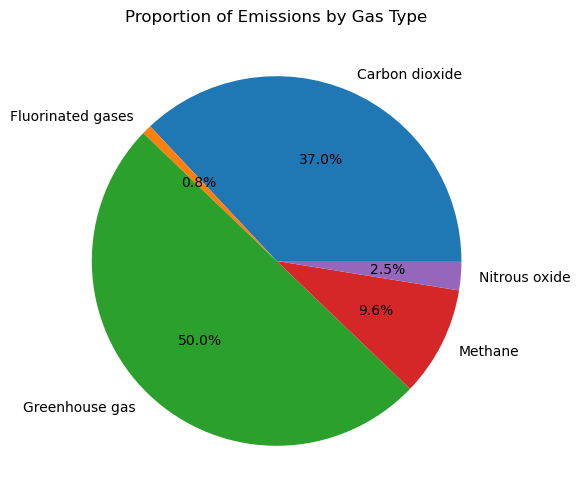

In [31]:
# Pie chart for proportion of emissions by gas type
plt.figure(figsize=(8, 6))
df.groupby('Gas_Type')['Total_Emissions'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Emissions by Gas Type')
plt.ylabel('')
plt.show()

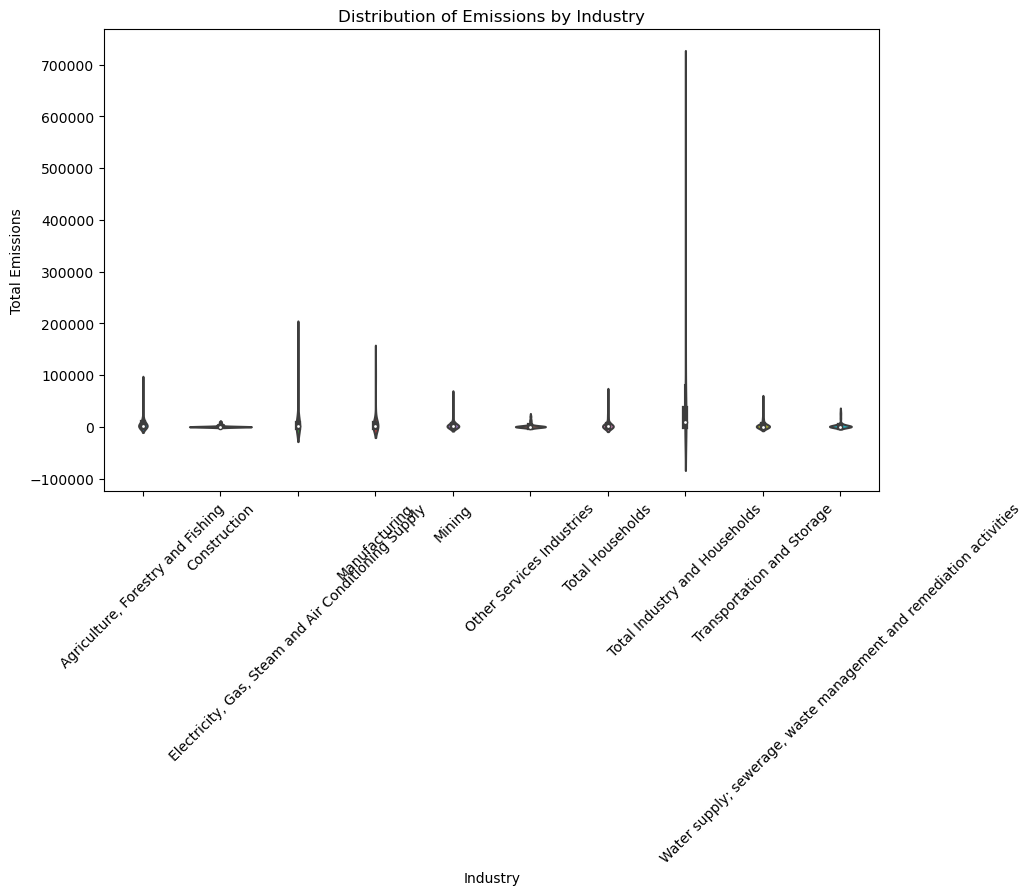

In [32]:
# Violin plot for distribution of emissions by industry
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Industry', y='Total_Emissions')
plt.title('Distribution of Emissions by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()

In [33]:
df.columns

Index(['Country', 'ISO2', 'ISO3', 'Industry', 'Gas_Type', 'F2010', 'F2011',
       'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019',
       'F2020', 'F2021', 'F2022', 'Total_Emissions'],
      dtype='object')

In [34]:
#analysis by gas_type
industry_analysis = df.groupby('Industry')['Total_Emissions'].sum().sort_values(ascending=False)

In [35]:
#create dropdown widget for industry analysis 
industry_dropdown = widgets.Dropdown(
    options = industry_analysis.index,
    value = 'Total Industry and Households',
    description = 'Industry: ')

In [36]:
#function to update visualization
def update_industry(industry):
    plt.figure(figsize=(10,6))
    df[df['Industry'] == industry].groupby('F2010')['Total_Emissions'].sum().plot()
    plt.title(f'Total emission Trend for {industry}')
    plt.xlabel('F2010')
    plt.ylabel('Total emission (in millions)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [37]:
# Interactive Industry plot
interactive_industry_plot = widgets.interactive(update_industry, industry=industry_dropdown)

In [38]:
display(interactive_industry_plot)

interactive(children=(Dropdown(description='Industry: ', options=('Total Industry and Households', 'Electricit…

In [39]:
df.columns

Index(['Country', 'ISO2', 'ISO3', 'Industry', 'Gas_Type', 'F2010', 'F2011',
       'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019',
       'F2020', 'F2021', 'F2022', 'Total_Emissions'],
      dtype='object')

In [40]:
# Filter the dataset to include all the industries
industry_df = df[df['Industry'] == df['Industry']]

In [41]:
industry_df

,Country,ISO2,ISO3,Industry,Gas_Type,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022,Total_Emissions
0,Advanced Economies,NaN,AETMP,"Agriculture, Forestry and Fishing",Carbon dioxide,194.398492,191.201537,192.473034,190.048764,190.966649,193.338608,187.562070,189.440100,188.437327,187.905257,182.266715,187.438675,184.520601,2459.997827
1,Advanced Economies,NaN,AETMP,"Agriculture, Forestry and Fishing",Fluorinated gases,0.900844,0.948342,0.955449,1.029110,0.986873,1.011099,0.963934,0.950728,0.821667,0.783003,0.747345,0.702196,0.707047,11.507636
2,Advanced Economies,NaN,AETMP,"Agriculture, Forestry and Fishing",Greenhouse gas,1370.031102,1350.212366,1334.456632,1377.599894,1392.829858,1400.464829,1361.477669,1369.628014,1378.475201,1375.349001,1338.959570,1344.523950,1330.550899,17724.558985
3,Advanced Economies,NaN,AETMP,"Agriculture, Forestry and Fishing",Methane,641.415104,636.893906,637.064644,633.493095,633.856107,639.263923,633.542996,639.543088,641.580792,634.344665,631.733383,630.457326,621.965004,8255.154032
4,Advanced Economies,NaN,AETMP,"Agriculture, Forestry and Fishing",Nitrous oxide,533.316661,521.168581,503.963505,553.028925,567.020229,566.851200,539.408671,539.694098,547.635416,552.316076,524.212127,525.925753,523.358247,6997.899490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,World,NaN,WLD,"Water supply; sewerage, waste management and r...",Carbon dioxide,156.348730,157.792392,162.289961,165.312195,163.046659,165.504266,169.854553,173.961476,172.105045,168.275866,164.666578,174.697139,177.237293,2171.092151
1182,World,NaN,WLD,"Water supply; sewerage, waste management and r...",Fluorinated gases,5.958067,6.762982,7.890352,8.664948,9.375556,10.159372,11.178932,12.260119,13.095187,13.327889,12.691501,11.731265,11.615250,134.711421
1183,World,NaN,WLD,"Water supply; sewerage, waste management and r...",Greenhouse gas,2202.583180,2240.447082,2284.232080,2325.122735,2363.749204,2404.982343,2443.202214,2489.451028,2531.849241,2562.394065,2586.145910,2630.270486,2675.233742,31739.663310
1184,World,NaN,WLD,"Water supply; sewerage, waste management and r...",Methane,1929.636985,1963.335951,1998.979760,2034.005878,2072.130529,2108.301375,2138.492867,2177.122459,2219.058459,2251.997128,2278.513920,2311.960509,2352.389167,27835.924987


In [42]:
# Calculate total emissions for each gas type
industry_df['Total_Emissions'] = industry_df[['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 
                                                               'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']].sum(axis=1)

In [43]:
# Define a dropdown widget for selecting the year
year_dropdown = widgets.Dropdown(
    options=['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022'],
    value='F2010',
    description='Select Year:',
    disabled=False,
)

# Define a dropdown widget for selecting the industry
industry_dropdown = widgets.Dropdown(
    options=df['Industry'].unique(),
    value='Agriculture, Forestry and Fishing',
    description='Select Industry: ',
    disabled=False,
)

In [44]:
def update_plot(industry):
    # Filter the dataset based on the selected industry
    industry_df = df[df['Industry'] == industry]
    
    # Calculate total emissions for each gas type
    industry_df['Total_Emissions'] = industry_df[['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 
                                                   'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']].sum(axis=1)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=industry_df, x='Gas_Type', y='Total_Emissions')
    plt.title(f'Total Emissions by Gas Type from (F2010 - F2022) - {industry}')
    plt.xlabel('Gas Type')
    plt.ylabel('Total Emissions')
    plt.xticks(rotation=45)
    plt.show()


In [45]:
# Display the dropdowns and plot
widgets.interactive(update_plot, industry=industry_dropdown)

interactive(children=(Dropdown(description='Select Industry: ', options=('Agriculture, Forestry and Fishing', …